In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

In [2]:
df_heart = pd.read_csv('heart.csv')
df_heart.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df_heart.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
le = LabelEncoder()#changing of categorical to numerical label
df_heart_transform = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
df_heart[df_heart_transform] = df_heart[df_heart_transform].apply(le.fit_transform)

In [7]:
df_heart['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [8]:
df_heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:>

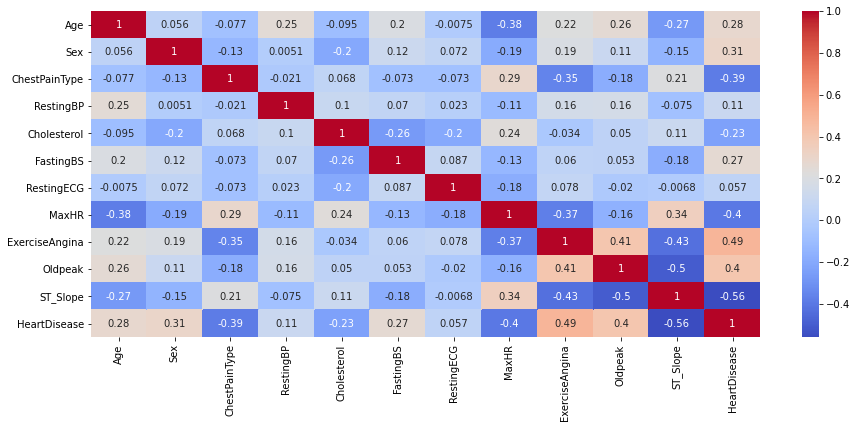

In [9]:
plt.figure(figsize = (15,6))
sns.heatmap(df_heart.corr(), annot= True, cmap = 'coolwarm')

In [10]:
#Splitting x and Y
X = df_heart.drop('HeartDisease',1)

y = df_heart['HeartDisease']

X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [12]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
652,59,1,3,160,273,0,0,125,0,0.0,2
201,46,1,2,120,230,0,1,150,0,0.0,2
917,38,1,2,138,175,0,1,173,0,0.0,2
659,59,1,2,126,218,1,1,134,0,2.2,1
801,56,1,0,132,184,0,0,105,1,2.1,1
...,...,...,...,...,...,...,...,...,...,...,...
575,56,1,0,137,282,1,1,126,1,1.2,1
838,63,1,0,130,330,1,0,132,1,1.8,2
337,63,1,0,150,0,1,2,154,0,3.7,2
523,59,1,0,124,160,0,1,117,1,1.0,1


In [13]:
df_heart.shape

(918, 12)

In [14]:
# from sklearn.linear_model import LogisticRegression

# lm = LogisticRegression()


# lm.fit(X_train, y_train)

# y_pred = lm.predict(X_test)


In [15]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [16]:
# #randomized search cv with svm
# from sklearn.model_selection import RandomizedSearchCV
# rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
#         'C': [1,10,20],
#         'kernel': ['rbf','linear']
#     }, 
#     cv=5, 
#     return_train_score=False, 
#     n_iter=2
# )
# rs.fit(X, y)
# pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [18]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [19]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.819138,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.809313,{'n_estimators': 10}
2,logistic_regression,0.807151,{'C': 5}


In [20]:
#using SVM
model = svm.SVC(kernel='linear',C=10,gamma='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        79
           1       0.84      0.84      0.84       105

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184

